# Import

In [11]:
import time
import pandas as pd
from dotenv import load_dotenv
import os
import openai
from openai import OpenAI
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize variables

In [3]:
load_dotenv()
API_KEY = os.getenv("API_KEY")

In [56]:
client = OpenAI(
  api_key=API_KEY
)

In [61]:
decisions = ['unacceptable', 'acceptable', 'good', 'very good']

In [57]:
buying_price = None
maintenance_cost = None
number_of_doors = None
number_of_persons = None
lug_boot = None
safety = None

In [55]:
system_message = "You are an AI agent tasked with evaluating cars based on specific conditions. You will choose one of the following evaluations: unacceptable, acceptable, good, very good. You must provide only one evaluation, without any additional explanation."
user_message = f"Given the following car conditions:\n- Buying price: {buying_price}\n- Maintenance cost: {maintenance_cost}\n- Number of doors: {number_of_doors}\n- Number of persons it can carry: {number_of_persons}\n- Size of the luggate boot: {lug_boot}\n- Car safety level: {safety}\nChoose one of the following evaluations for this car:\n- unacceptable\n- acceptable\n- good\n- very good\nYour response should be one of the 4 above options, without any other words."
messages = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_message}
]

# Make API calls

## Case decision = unacceptable

In [73]:
# conditions
buying_price = 'medium'
maintenance_cost = 'medium'
number_of_doors = 3
number_of_persons = 4
lug_boot = 'small'
safety = 'low'

# list to store agents' answers
unacceptable_answers = []

In [ ]:
# make 100 api calls
for _ in range (100):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages
    )
    # store answer
    unacceptable_answers.append(completion.choices[0].message.content)
    time.sleep(20)


In [108]:
unacceptable_results = [unacceptable_answers.count(decision) for decision in decisions]
unacceptable_results

[100, 0, 0, 0]

## Case acceptable

In [ ]:
# conditions
buying_price = 'medium'
maintenance_cost = 'medium'
number_of_doors = 3
number_of_persons = 4
lug_boot = 'small'
safety = 'low'

# list to store agents' answers
acceptable_answers = []


In [44]:
for _ in range (100):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages
    )
    acceptable_answers.append(completion.choices[0].message.content)

In [68]:
acceptable_results = [acceptable_answers.count(decision) for decision in decisions]
acceptable_results

[0, 33, 67, 0]

# Store results to data frame

In [8]:
columns = ['true_evaluation', 'n_unacceptable', 'n_acceptable', 'n_good', 'n_very_good']
df = pd.DataFrame(columns=columns)
row_unacceptable = ['unacceptable'] + unacceptable_results
row_acceptable = ['acceptable'] + acceptable_results
new_rows = pd.DataFrame([row_unacceptable, row_acceptable], columns=df.columns)
df = pd.concat([df, new_rows], ignore_index=True)
df

,true_evaluation,n_unacceptable,n_acceptable,n_good,n_very_good
0,unacceptable,100,0,0,0
1,acceptable,0,33,67,0


In [9]:
df.to_csv('data/result.csv', index=False)

/tmp/ipykernel_56368/3085159299.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


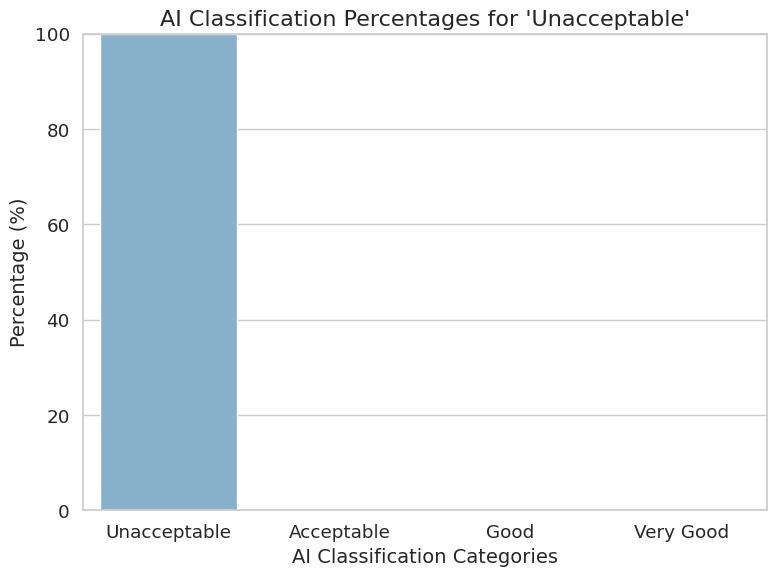

/tmp/ipykernel_56368/3085159299.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


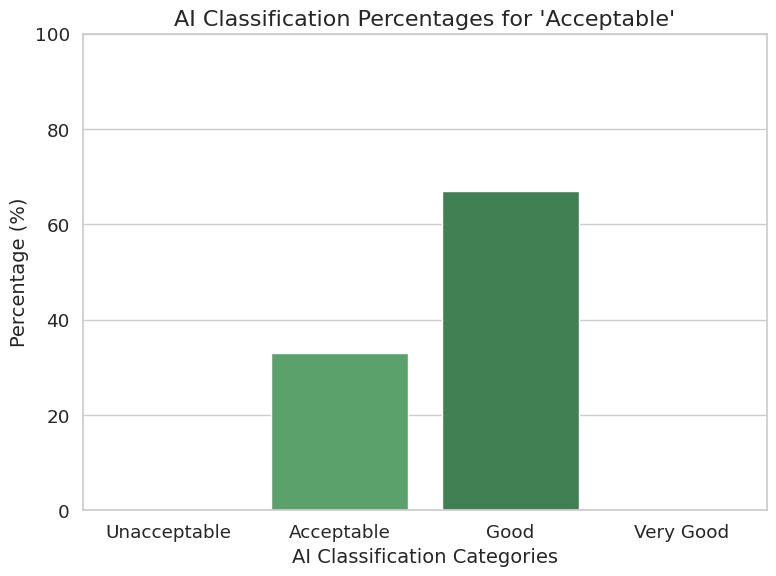

In [16]:
# Calculate percentages for each row
category_columns = ["n_unacceptable", "n_acceptable", "n_good", "n_very_good"]
df["total"] = df[category_columns].sum(axis=1)
for col in category_columns:
    df[col + "_pct"] = (df[col] / df["total"]) * 100

# Set up the seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Plot for "unacceptable" row
plt.figure(figsize=(8, 6))
sns.barplot(
    x=["Unacceptable", "Acceptable", "Good", "Very Good"],
    y=df.iloc[0][[col + "_pct" for col in category_columns]].values,
    palette="Blues_d"
)
plt.title("AI Classification Percentages for 'Unacceptable'", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xlabel("AI Classification Categories", fontsize=14)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Plot for "acceptable" row
plt.figure(figsize=(8, 6))
sns.barplot(
    x=["Unacceptable", "Acceptable", "Good", "Very Good"],
    y=df.iloc[1][[col + "_pct" for col in category_columns]].values,
    palette="Greens_d"
)
plt.title("AI Classification Percentages for 'Acceptable'", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xlabel("AI Classification Categories", fontsize=14)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()